### Import necessary libraries

In [2]:
import pandas as pd
from textblob import TextBlob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

### Configure Loguru logger for debugging and tracking

In [3]:
logger.add(
    "../logs/sentiment_analysis.log",
    rotation="5 MB",
    retention="10 days",
    level="INFO",
    enqueue=True,
    backtrace=True,
    diagnose=True
)


1

### analyze sentiment

In [4]:
def analyze_sentiment(text):
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity  # Sentiment polarity range: -1 (negative) to 1 (positive)
    except Exception as e:
        logger.error(f"Error analyzing sentiment: {e}")
        return 0

### paths for data loading and saving

In [6]:
processed_data_path = '../data/processed_data/british_airways_preprocessed_reviews.csv'
analysis_data_path = '../data/analysis/british_airways_reviews_with_sentiment.csv'


In [7]:
# Ensure analysis data directory exists
os.makedirs('../data/analysis/', exist_ok=True)

### Load processed data

In [8]:
try:
    df = pd.read_csv(processed_data_path)
    logger.info(f"Loaded cleaned data with {len(df)} reviews.")
    display(df.head())  # Display first few rows of the data for review
except Exception as e:
    logger.error(f"Error loading cleaned data: {e}")


2024-10-29 16:50:43.274 | INFO     | __main__:<module>:3 - Loaded cleaned data with 2000 reviews.


,content_preprocessed
0,arriving mexico airport told flight delayed ai...
1,flown british airway many year still regularly...
2,bought ticket geneva london flight got airport...
3,appalling service failing defective fleet a380...
4,british airway charge pleasure choosing seat p...


### Perform sentiment analysis on the 'content_preprocessed' column

In [9]:
try:
    logger.info("Starting sentiment analysis.")
    df['sentiment_polarity'] = df['content_preprocessed'].apply(analyze_sentiment)
    display(df[['content_preprocessed', 'sentiment_polarity']].sample(5))  # Show sample of analysis results
except Exception as e:
    logger.error(f"Error during sentiment analysis: {e}")


2024-10-29 16:52:34.996 | INFO     | __main__:<module>:2 - Starting sentiment analysis.


,content_preprocessed,sentiment_polarity
646,first one smoothest uk u flight taken boarding...,-0.030000
393,would happily fly personal emergency allowed r...,0.365909
1668,verified review san jose london gatwick return...,0.087083
141,want warn everyone worst customer service expe...,0.077778
1162,whatever happened world favourite airline retu...,0.003472


### Save the analysis data with sentiment polarity

In [10]:
try:
    df.to_csv(analysis_data_path, index=False)
    logger.info(f"Sentiment analysis results saved to {analysis_data_path}")
except Exception as e:
    logger.error(f"Error saving analysis data: {e}")

2024-10-29 17:00:53.319 | INFO     | __main__:<module>:3 - Sentiment analysis results saved to ../data/analysis/british_airways_reviews_with_sentiment.csv


### Plot the sentiment polarity distribution

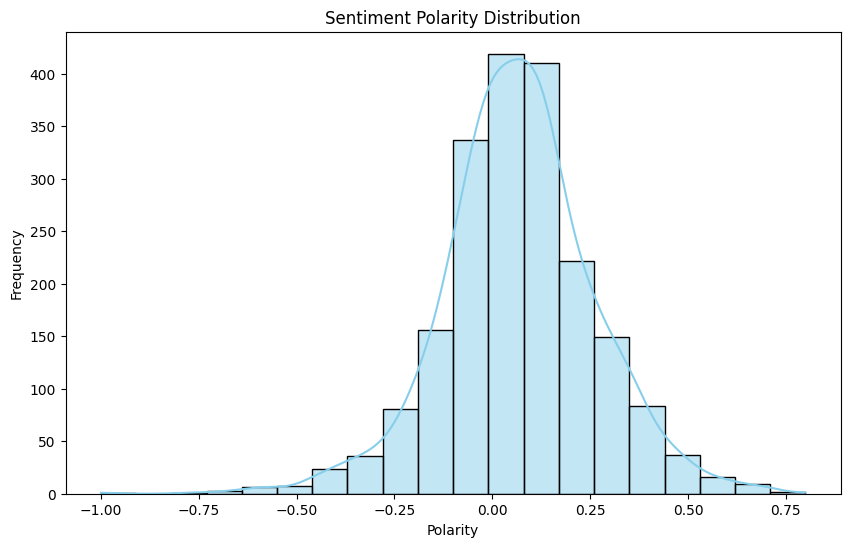

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


### Save the plot

In [12]:
try:
    plt.savefig('../data/analysis/sentiment_distribution.png')
    logger.info("Sentiment distribution plot saved.")
except Exception as e:
    logger.error(f"Error saving sentiment distribution plot: {e}")


2024-10-29 17:04:23.817 | INFO     | __main__:<module>:3 - Sentiment distribution plot saved.


<Figure size 640x480 with 0 Axes>